# Assignment 1: Uninformed Search

*Type your name here*

## Overview

Breadth-first and depth-first are two algorithms for performing
uninformed search---a search that does not use
knowledge about the goal of the search.  You will implement both
search algorithms in python and test them on a simple graph.

## Required Code

In this jupyter notebook, you must implement at least the following functions:

  * `breadthFirstSearch(startState, goalState, successorsf)` 
  * `depthFirstSearch(startState, goalState, successorsf)`
  
Each receives as arguments the starting state, the goal state, and a successors function.  `breadthFirstSearch` returns the breadth-first solution path as a list of states starting with the `startState` and ending with the `goalState`.  `depthFirstSearch` returns the depth-first solution path.

<font color="red">You must</font> implement the search algorithm as specified in [A3 Problem-Solving Agents](http://nbviewer.jupyter.org/url/www.cs.colostate.edu/~anderson/cs440/notebooks/03 Problem-Solving Agents.ipynb) lecture notes.

If you prefer to develop your python code in a separate editor or IDE, you may do so.  If it is stored in a file called `A1mysolution.py`, you can use it here by executing the following cell.

When your solution works, <font color="red">Remember</font> to remove or comment out the following import statement and instead, paste in all of your function definintions into this notebook.

In [1]:
from A1mysolution import * 

# Example

Here is a simple example.  States are defined by lower case letters.  A dictionary stores a list of successor states for each state in the graph that has successors.

In [2]:
successors = {'a':  ['b', 'c', 'd'],
              'b':  ['e', 'f', 'g'],
              'c':  ['a', 'h', 'i'],
              'd':  ['j', 'z'],
              'e':  ['k', 'l'],
              'g':  ['m'],
              'k':  ['z']}
successors

{'a': ['b', 'c', 'd'],
 'b': ['e', 'f', 'g'],
 'c': ['a', 'h', 'i'],
 'd': ['j', 'z'],
 'e': ['k', 'l'],
 'g': ['m'],
 'k': ['z']}

In [3]:
import copy

def successorsf(state):
    return copy.copy(successors.get(state, []))

In [4]:
successorsf('e')

['k', 'l']

In [5]:
print('Breadth-first')
print('path from a to a is', breadthFirstSearch('a', 'a', successorsf))
print('path from a to m is', breadthFirstSearch('a', 'm', successorsf))
print('path from a to z is', breadthFirstSearch('a', 'z', successorsf))

Breadth-first
path from a to a is ['a']
path from a to m is ['a', 'b', 'g', 'm']
path from a to z is ['a', 'd', 'z']


In [6]:
print('Depth-first')
print('path from a to a is', depthFirstSearch('a', 'a', successorsf))
print('path from a to m is', depthFirstSearch('a', 'm', successorsf))
print('path from a to z is', depthFirstSearch('a', 'z', successorsf))

Depth-first
path from a to a is ['a']
path from a to m is ['a', 'b', 'g', 'm']
path from a to z is ['a', 'b', 'e', 'k', 'z']


Let's try a navigation problem around a grid of size 10 x 10.

In [24]:
def gridSuccessors(state):
    row, col = state
    # succs will be list of tuples () rather than list of lists [] because state must
    # be an immutable type to serve as a key in dictionary of expanded nodes
    succs = []
    for r in [-1, 0, 1]:
        for c in [-1, 0, 1]:
            newr = row + r
            newc = col + c
            if 0 <= newr <= 9 and 0 <= newc <= 9:  # cool, huh?
                succs.append( (newr, newc) )
    return succs

In [25]:
gridSuccessors([3,4])

[(2, 3), (2, 4), (2, 5), (3, 3), (3, 4), (3, 5), (4, 3), (4, 4), (4, 5)]

In [26]:
gridSuccessors([3,9])

[(2, 8), (2, 9), (3, 8), (3, 9), (4, 8), (4, 9)]

In [27]:
gridSuccessors([0,0])

[(0, 0), (0, 1), (1, 0), (1, 1)]

In [28]:
print('Breadth-first')
print('path from (0, 0) to (9, 9) is', breadthFirstSearch((0, 0), (9, 9), gridSuccessors))

Breadth-first
path from (0, 0) to (9, 9) is [(0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (6, 6), (7, 7), (8, 8), (9, 9)]


In [29]:
print('Depth-first')
print('path from (0, 0) to (9, 9) is', depthFirstSearch((0, 0), (9, 9), gridSuccessors))

Depth-first
path from (0, 0) to (9, 9) is [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (1, 9), (2, 8), (2, 7), (2, 6), (2, 5), (2, 4), (2, 3), (2, 2), (2, 1), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 1), (8, 2), (7, 2), (6, 2), (5, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7), (4, 8), (5, 9), (6, 8), (6, 7), (6, 6), (6, 5), (7, 4), (8, 4), (9, 5), (8, 6), (8, 7), (8, 8), (9, 9)]


Oooo, what kind of path is that?  Let's plot it.

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
path = depthFirstSearch((0, 0), (9, 9), gridSuccessors)
path

[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (1, 9),
 (2, 8),
 (2, 7),
 (2, 6),
 (2, 5),
 (2, 4),
 (2, 3),
 (2, 2),
 (2, 1),
 (3, 0),
 (4, 0),
 (5, 0),
 (6, 0),
 (7, 0),
 (8, 0),
 (9, 1),
 (8, 2),
 (7, 2),
 (6, 2),
 (5, 2),
 (4, 3),
 (4, 4),
 (4, 5),
 (4, 6),
 (4, 7),
 (4, 8),
 (5, 9),
 (6, 8),
 (6, 7),
 (6, 6),
 (6, 5),
 (7, 4),
 (8, 4),
 (9, 5),
 (8, 6),
 (8, 7),
 (8, 8),
 (9, 9)]

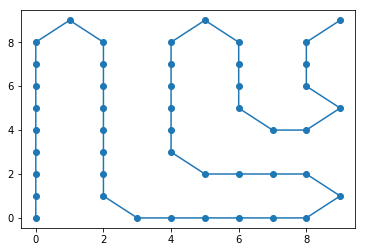

In [32]:
rows = [location[0] for location in path]
cols = [location[1] for location in path]
plt.plot(rows,cols,'o-');

In [33]:
path = breadthFirstSearch((0, 0), (9, 9), gridSuccessors)
path

[(0, 0),
 (1, 1),
 (2, 2),
 (3, 3),
 (4, 4),
 (5, 5),
 (6, 6),
 (7, 7),
 (8, 8),
 (9, 9)]

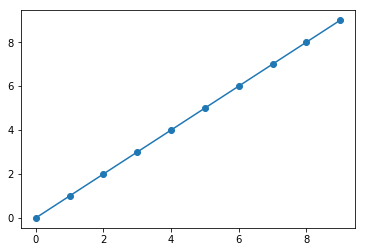

In [34]:
rows = [location[0] for location in path]
cols = [location[1] for location in path]
plt.plot(rows,cols,'o-');

In [36]:
depthFirstSearch((0, 0), (9, 20), gridSuccessors)

Goal not found


# Extra Credit

For extra credit, use your functions to solve the Camels Puzzle, described at [Logic Puzzles](http://www.folj.com/puzzles/).
The following code illustrates one possible state representation and shows results of a breadth-first and a dept-first search.  You must define a new successors function, called `camelSuccessorsf`. 

In [7]:
camelStartState

('R', 'R', 'R', 'R', ' ', 'L', 'L', 'L', 'L')

In [8]:
camelGoalState

('L', 'L', 'L', 'L', ' ', 'R', 'R', 'R', 'R')

In [9]:
camelSuccessorsf(camelStartState)

[('R', 'R', 'R', ' ', 'R', 'L', 'L', 'L', 'L'),
 ('R', 'R', 'R', 'R', 'L', ' ', 'L', 'L', 'L')]

In [10]:
children = camelSuccessorsf(camelStartState)
print(children[0])
camelSuccessorsf(children[0])

('R', 'R', 'R', ' ', 'R', 'L', 'L', 'L', 'L')


[('R', 'R', ' ', 'R', 'R', 'L', 'L', 'L', 'L'),
 ('R', 'R', 'R', 'L', 'R', ' ', 'L', 'L', 'L')]

In [11]:
bfs = breadthFirstSearch(camelStartState, camelGoalState, camelSuccessorsf)
print('Breadth-first solution: (', len(bfs), 'steps)')
for s in bfs:
    print(s)

dfs = depthFirstSearch(camelStartState, camelGoalState, camelSuccessorsf)
print('Depth-first solution: (', len(dfs), 'steps)')
for s in dfs:
    print(s)

Breadth-first solution: ( 25 steps)
('R', 'R', 'R', 'R', ' ', 'L', 'L', 'L', 'L')
('R', 'R', 'R', ' ', 'R', 'L', 'L', 'L', 'L')
('R', 'R', 'R', 'L', 'R', ' ', 'L', 'L', 'L')
('R', 'R', 'R', 'L', 'R', 'L', ' ', 'L', 'L')
('R', 'R', 'R', 'L', ' ', 'L', 'R', 'L', 'L')
('R', 'R', ' ', 'L', 'R', 'L', 'R', 'L', 'L')
('R', ' ', 'R', 'L', 'R', 'L', 'R', 'L', 'L')
('R', 'L', 'R', ' ', 'R', 'L', 'R', 'L', 'L')
('R', 'L', 'R', 'L', 'R', ' ', 'R', 'L', 'L')
('R', 'L', 'R', 'L', 'R', 'L', 'R', ' ', 'L')
('R', 'L', 'R', 'L', 'R', 'L', 'R', 'L', ' ')
('R', 'L', 'R', 'L', 'R', 'L', ' ', 'L', 'R')
('R', 'L', 'R', 'L', ' ', 'L', 'R', 'L', 'R')
('R', 'L', ' ', 'L', 'R', 'L', 'R', 'L', 'R')
(' ', 'L', 'R', 'L', 'R', 'L', 'R', 'L', 'R')
('L', ' ', 'R', 'L', 'R', 'L', 'R', 'L', 'R')
('L', 'L', 'R', ' ', 'R', 'L', 'R', 'L', 'R')
('L', 'L', 'R', 'L', 'R', ' ', 'R', 'L', 'R')
('L', 'L', 'R', 'L', 'R', 'L', 'R', ' ', 'R')
('L', 'L', 'R', 'L', 'R', 'L', ' ', 'R', 'R')
('L', 'L', 'R', 'L', ' ', 'L', 'R', 'R', 'R'

## Grading

Your notebook will be run and graded automatically. Download [A1grader.tar](http://www.cs.colostate.edu/~anderson/cs440/notebooks/A1grader.tar)  and extract A1grader.py from it. Run the code in the following cell to demonstrate an example grading session. You should see a perfect score of 80/100 if your functions are defined correctly. 

The remaining 20% will be based on your writing.  In markdown cells, explain what your functions are doing and summarize the algorithms.

Add at least one markdown cell that describes problems you encountered in trying to solve this assignment.

## Check-in

Do not include this section in your notebook.

Name your notebook ```Lastname-A1.ipynb```.  So, for me it would be ```Anderson-A1.ipynb```.  Submit the file using the ```Assignment 1``` link on [Canvas](https://colostate.instructure.com/courses/55296).

Grading will be based on 

  * correct behavior of the required functions, and
  * readability of the notebook.

In [12]:
%run -i A1grader.py

Searching this graph:
 {'c': ['e'], 'a': ['b'], 'e': ['g', 'h', 'i'], 'd': ['f', 'i'], 'b': ['c', 'd']}
Looking for path from a to b.
20/20 points. Your breadthFirstSearch found correct solution path of ['a', 'b']
20/20 points. Your depthFirstSearch found correct solution path of ['a', 'b']
Looking for path from a to i.
20/20 points. Your breadthFirstSearch found correct solution path of ['a', 'b', 'd', 'i']
20/20 points. Your depthFirstSearch found correct solution path of ['a', 'b', 'c', 'e', 'i']

assign1 Grade is 80/100
Up to 20 more points will be given based on the qualty of your descriptions of the method and the results.
